In [59]:
import pandas as pd
import os
os.getcwd()
from sklearn.model_selection import train_test_split as tts
import dask.dataframe as dd
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import auc,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline

In [2]:
os.chdir('/home/greyatom/Desktop/hackathon 2')

In [3]:
df= pd.read_csv('train.csv')
df.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,2,H,224,0,4300,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,4,H,7,53,4448,B,1.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,5,H,116,3,3464,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
3,7,H,240,300,3200,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,RCC,0
4,8,R,72,261,2000,N,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1


In [4]:
import numpy as np
a = np.random.randint(0,140000,50000).tolist()
# a.append(1934)

In [5]:
df_stratified = df.iloc[a,:]

In [6]:
# X = df.drop('target',1)
# y = df['target']
# X_train, X_test, y_train, y_test = tts(X,y,test_size=0.70, random_state=42, stratify = y )

In [7]:
numeric_df = df_stratified.select_dtypes(exclude='O')

In [8]:
df_stratified.shape

(50000, 1934)

In [9]:
a = df_stratified.isnull().sum()


In [10]:
missing_drop = a[a > 1000].index.tolist()

In [11]:
# X_train_old = X_train.copy()
df_1 = df_stratified.drop(missing_drop,1)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [13]:
lr = LogisticRegression()
rf= RandomForestClassifier(random_state=42)

In [14]:
# categorical_df = df_1[list(set(df_1.columns) - set(numeric_df.columns))]
categorical_df = df_stratified.select_dtypes(include='O')
categorical_df.shape

(50000, 51)

In [15]:
cols_to_be_deleted = []
for col in numeric_df:   
    if(len(list(numeric_df[col].unique()))==1 or (len(list(numeric_df[col].unique()))==2 and (numeric_df[col].isnull().sum()>0))):
        cols_to_be_deleted.append(col)

In [16]:
numeric_df=numeric_df.drop(cols_to_be_deleted,1)

In [17]:
cat_cols_to_be_deleted = []
for col in categorical_df:   
    if(len(list(categorical_df[col].unique()))==1 or (len(list(categorical_df[col].unique()))==2 and (categorical_df[col].isnull().sum()>0))):
        cat_cols_to_be_deleted.append(col)

In [18]:
categorical_df[cat_cols_to_be_deleted].head()

,VAR_0008,VAR_0009,VAR_0010,VAR_0011,VAR_0012,VAR_0043,VAR_0044,VAR_0196,VAR_0202,VAR_0216,VAR_0222,VAR_0229,VAR_0239
135990,False,False,False,False,False,False,[],False,BatchInquiry,DS,C6,False,False
61699,False,False,False,False,False,False,[],False,BatchInquiry,DS,C6,False,False
84234,False,False,False,False,False,False,[],False,BatchInquiry,DS,C6,False,False
63412,False,False,False,False,False,False,[],False,BatchInquiry,DS,C6,False,False
77269,False,False,False,False,False,False,[],False,BatchInquiry,DS,C6,False,False


In [20]:
# categorical_df = categorical_df.drop(['VAR_0008','VAR_0009','VAR_0010','VAR_0011','VAR_0012','VAR_0043','VAR_0044','VAR_0196','VAR_0202','VAR_0216','VAR_0222','VAR_0229','VAR_0239'],1)

In [19]:
categorical_df = categorical_df.drop(cat_cols_to_be_deleted,1)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
for column in categorical_df:
    categorical_df[column] = categorical_df[column].fillna(categorical_df[column].mode()[0])

In [22]:
for column in categorical_df:
    categorical_df[column]=le.fit_transform(categorical_df[column])

In [23]:
# shape after get dummies is 23965 columns 
# pd.get_dummies(data = categorical_df, columns = categorical_df.columns)

In [24]:
cleaned_df = pd.concat([numeric_df,categorical_df],axis = 1)
# cleaned_df = numeric_df

In [25]:
cleaned_df.head()

,ID,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,...,VAR_0325,VAR_0342,VAR_0352,VAR_0353,VAR_0354,VAR_0404,VAR_0466,VAR_0467,VAR_0493,VAR_1934
135990,271851,425,33,1349,0.0,0.0,0.0,0.0,0.0,1.0,...,5,48,1,2,2,0,0,0,0,0
61699,123287,38,31,2900,1.0,1.0,1.0,1.0,1.0,1.0,...,7,25,3,1,2,0,1,2,0,2
84234,168517,14,12,3000,1.0,1.0,1.0,1.0,1.0,3.0,...,3,35,2,2,3,0,0,0,0,2
63412,126754,14,41,2467,0.0,0.0,0.0,0.0,0.0,1.0,...,3,33,3,2,3,0,0,0,0,0
77269,154798,88,201,1150,0.0,0.0,0.0,0.0,0.0,1.0,...,5,34,2,2,2,164,0,0,0,0


In [26]:
# X_train_final,X_test_final,y_train_new,y_test_new = tts()
X=cleaned_df.drop(['ID','target'],1)
y= cleaned_df['target']

In [27]:
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.2,random_state = 42)

In [28]:
X_train = X_train.fillna(0)


In [29]:
X_test = X_test.fillna(0)

In [58]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [60]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8293
[[7460  245]
 [1462  833]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      7705
           1       0.77      0.36      0.49      2295

   micro avg       0.83      0.83      0.83     10000
   macro avg       0.80      0.67      0.70     10000
weighted avg       0.82      0.83      0.80     10000



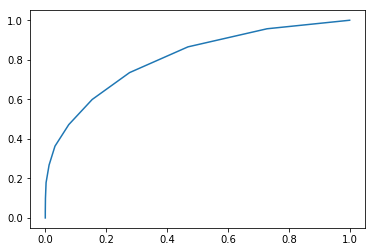

In [64]:
from sklearn.metrics import auc,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
rf_proba = rf.predict_proba(X_test)[:,1]
roc_auc_score(y_test,rf_proba)
fpr,tpr,_ = roc_curve(y_test,rf_proba)
plt.plot(fpr,tpr)
auc_rf = auc(fpr,tpr)

In [113]:
auc_rf

0.8065144298400015

In [68]:
names = X_train.columns
a = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)

In [69]:
rf_50_column = [x[1] for x in a][:50]

In [70]:
X_train_50 = X_train[rf_50_column]
X_train_30 = X_train[rf_50_column][:30]
X_train_20 = X_train[rf_50_column][:20]

In [71]:
rf_1 = RandomForestClassifier()

In [72]:
rf_1.fit(X_train_50,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
y_pred1 = rf_1.predict(X_test[rf_50_column])
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.8243
[[7419  286]
 [1471  824]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7705
           1       0.74      0.36      0.48      2295

   micro avg       0.82      0.82      0.82     10000
   macro avg       0.79      0.66      0.69     10000
weighted avg       0.81      0.82      0.80     10000



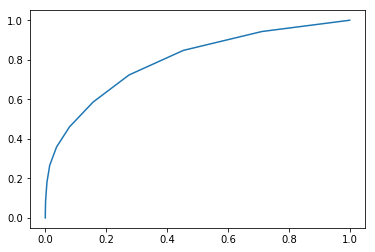

In [74]:

y_pred_rf_50 = rf_1.predict_proba(X_test[rf_50_column])[:,1]
roc_auc_score(y_test,y_pred_rf_50)
fpr,tpr,_ = roc_curve(y_test,y_pred_rf_50)
plt.plot(fpr,tpr)
auc_rf_50 = auc(fpr,tpr)

In [75]:
auc_rf_50

0.7962810839239438

In [76]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 50)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)
# explained_variance = pca.explained_variance_ratio_

In [81]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
y_pred_dt = dt.predict(X_test)

In [85]:
print(accuracy_score(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

0.775
[[6572 1133]
 [1117 1178]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7705
           1       0.51      0.51      0.51      2295

   micro avg       0.78      0.78      0.78     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.78      0.78      0.78     10000



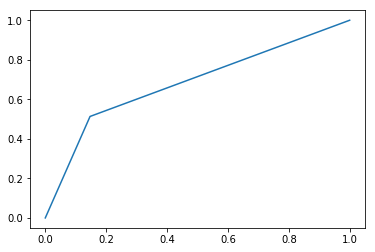

In [86]:
y_pred_dt = dt.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred_dt)
fpr,tpr,_ = roc_curve(y_test,y_pred_dt)
plt.plot(fpr,tpr)
auc_dt = auc(fpr,tpr)

In [87]:
auc_dt

0.6831211942560571

In [89]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [90]:
model = BaggingClassifier(dt)
model.fit(X_train_50, y_train)
# model.score(X_test,y_test)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [92]:
y_pred_bc = model.predict(X_test[X_train_50.columns])

In [93]:
print(confusion_matrix(y_test,y_pred_bc))
print(classification_report(y_test,y_pred_bc))

[[7378  327]
 [1446  849]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7705
           1       0.72      0.37      0.49      2295

   micro avg       0.82      0.82      0.82     10000
   macro avg       0.78      0.66      0.69     10000
weighted avg       0.81      0.82      0.80     10000



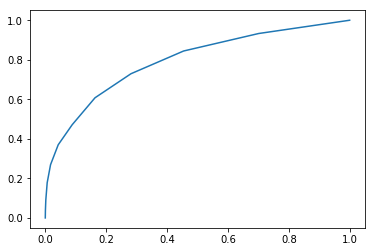

In [111]:
model_proba = model.predict_proba(X_test[X_train_50.columns])[:,1]
roc_auc_score(y_test,model_proba)
fpr,tpr,_ = roc_curve(y_test,model_proba)
plt.plot(fpr,tpr)
bag_auc = auc(fpr,tpr)

In [112]:
bag_auc

0.7941449049156037

In [98]:
model2 = AdaBoostClassifier()
model2.fit(X_train_50,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [99]:
y_pred_ada=model2.predict(X_test[X_train_50.columns])

In [100]:
model2.score(X_test[X_train_50.columns],y_test)

0.7765

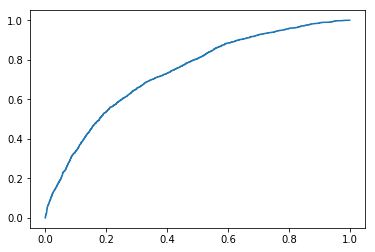

In [108]:
model2_proba = model2.predict_proba(X_test[X_train_50.columns])[:,1]
roc_auc_score(y_test,model2_proba)
fpr,tpr,_ = roc_curve(y_test,model2_proba)
plt.plot(fpr,tpr)
ada_auc = auc(fpr,tpr)

In [109]:
ada_auc

0.7365350004736194

In [103]:
model3=GradientBoostingClassifier()

In [104]:
model3.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [105]:
model3.score(X_test,y_test)

0.7956

In [106]:
y_pred_gb = model3.predict(X_test)
print(confusion_matrix(y_test,y_pred_gb))
print(classification_report(y_test,y_pred_gb))

[[7413  292]
 [1752  543]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7705
           1       0.65      0.24      0.35      2295

   micro avg       0.80      0.80      0.80     10000
   macro avg       0.73      0.60      0.61     10000
weighted avg       0.77      0.80      0.76     10000



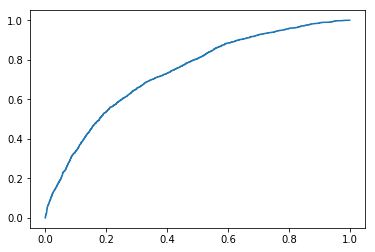

In [114]:
model3_proba = model3.predict_proba(X_test)[:,1]
roc_auc_score(y_test,model2_proba)
fpr,tpr,_ = roc_curve(y_test,model2_proba)
plt.plot(fpr,tpr)
gb_auc = auc(fpr,tpr)

In [115]:
gb_auc

0.7365350004736194